In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Função f(t, y)
def f(t, y):
    return -2*y + np.exp(-t)

### Runge-Kutta de 4ª ordem para obtenção de valores iniciais

In [21]:
# Método de Runge-Kutta de 4ª ordem
def runge_kutta_step(t, y, h):
    k1 = f(t, y)
    k2 = f(t + h/2, y + h*k1/2)
    k3 = f(t + h/2, y + h*k2/2)
    k4 = f(t + h, y + h*k3)
    return y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

### Adams-Bashforth-Moulton de quarta ordem com passo variável adaptativo

In [22]:
def abm4(f, t0, tf, y0, h):
    # Inicialização
    t_vals = [t0]
    y_vals = [y0]
    h_vals = []
    steps = 0 # Número de passos
    hmin = 0.01
    hmax = 0.25
    tol = 1e-5

    # Obtendo os 3 primeiros valores iniciais com o método RK4
    t = t0
    y = y0
    for _ in range(3):
        y = runge_kutta_step(t, y, h)
        t += h
        t_vals.append(t)
        y_vals.append(y)
        h_vals.append(h)
        steps += 1

    # Método ABM com passo adaptativo
    while t < tf:
        # utilizando as pontos iniciais obtidos por RK4
        yn3, yn2, yn1, yn = y_vals[-4:]
        tn3, tn2, tn1, tn = t_vals[-4:]

        fn3, fn2, fn1, fn = f(tn3, yn3), f(tn2, yn2), f(tn1, yn1), f(tn, yn)

        # Cálculo do valor predito por Adams-Bashforth de 4ª ordem
        yp = yn + h/24 * (55*fn - 59*fn1 + 37*fn2 - 9*fn3)
        fp = f(t + h, yp)

        # Cálculo do valor corrigido por Adams-Moulton de 4ª ordem
        yc = yn + h/24 * (9*fp + 19*fn - 5*fn1 + fn2)

        # Estimando o erro
        erro = abs(yp - yc)

        # Adaptar o passo
        h_novo = h * min(hmax, max(hmin, 0.9*(tol/erro)**(1/4)))
        h_novo = max(hmin, min(hmax, h_novo))  # garantindo limites e tentando impedir que ocorra divisão por zero

        if erro < tol or h <= hmin:
            t += h
            y = yc
            # Concatenando valores  nos arrays
            t_vals.append(t)
            y_vals.append(y)
            h_vals.append(h)
            steps += 1 # incrementando o número de passos

        h = h_novo

    # Convertendo para aray numpy
    t_vals = np.array(t_vals)
    y_vals = np.array(y_vals)
    h_vals = np.array(h_vals)

    return t_vals, y_vals, h_vals, steps

Definindo os parâmetros e aplicando o método ABM 4ª ordem

In [23]:
# Parâmetros
t0, tf = 0, 2 # Tempos inicial e final
y0 = 1
h = 0.01 # passo fixo para Runge-Kutta
# Aplicação do método ABM4
t_vals, y_vals, h_vals, steps = abm4(f, t0, tf, y0, h)

### Vetores t e y(t) com a solução aproximada

In [24]:
print("t =", t_vals)
print("y =", y_vals)

t = [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81
 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95
 1

### Gráfico da solução aproximada

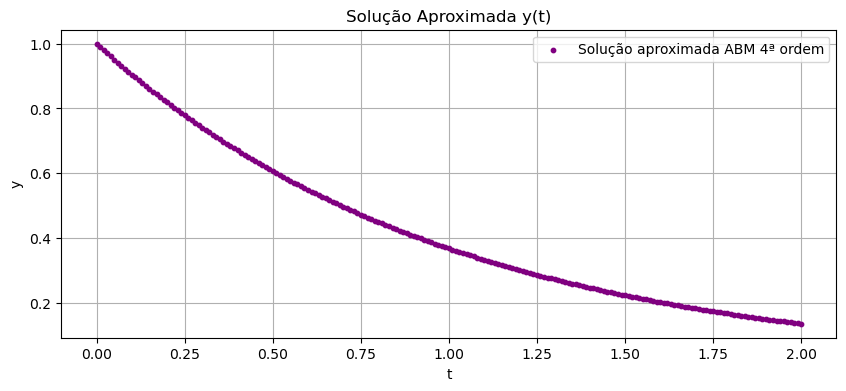

In [25]:
plt.figure(figsize=(10, 4))
# Plotando Solução aproximada
plt.scatter(t_vals, y_vals, label='Solução aproximada ABM 4ª ordem', color='purple', marker='o', s=10, zorder=3)
plt.title("Solução Aproximada y(t)")
plt.xlabel("t")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

### Gráfico do tamanho do passo h ao longo do tempo

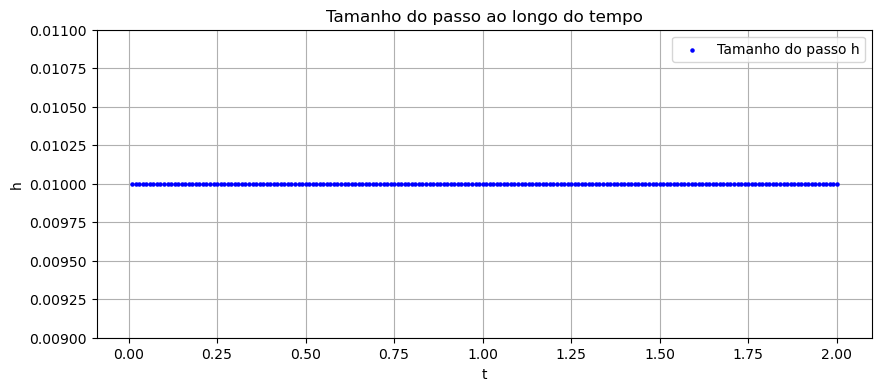

In [26]:
plt.figure(figsize=(10, 4))
plt.scatter(t_vals[1:], h_vals, label='Tamanho do passo h', color='blue', marker='o', s=5, zorder=3)
plt.ylim(0.009, 0.011)
plt.title("Tamanho do passo ao longo do tempo")
plt.xlabel("t")
plt.ylabel("h")
plt.grid(True)
plt.legend()
plt.show()

Imprimindo o número total de passos utilizados

In [27]:
print(f"Total de passos realizados: {steps}")

Total de passos realizados: 200
